In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#Importing the needed libraries
import pandas as pd
import numpy as np
#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#Preprocessing and statistical analysis libraries
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from scipy import stats
from scipy.stats import spearmanr, chi2_contingency, ttest_rel
#Model metrics libraries
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, auc
#ML Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:7
    print(os.path.join(dirname,filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
import pandas as pd

pd.set_option('display.max_columns', None)
df = pd.read_csv("your-file-name.csv")
df.sample(10)
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
import pandas as pd

pd.set_option('display.max_columns', None)
df = pd.read_csv("digital_marketing_campaign_dataset.csv")
df.sample(10)



,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
405,8405,49,Male,38546,PPC,Conversion,7728.272216,0.046370,0.167688,25,8.589227,10.163824,25,13,9,0,1637,IsConfid,ToolConfid,1
1719,9719,18,Male,116728,Email,Consideration,7381.977891,0.229857,0.101377,32,4.305580,7.100671,76,7,5,5,2833,IsConfid,ToolConfid,1
3868,11868,54,Female,28430,Email,Awareness,3279.630327,0.207348,0.010100,30,6.174578,8.749142,50,13,8,3,3711,IsConfid,ToolConfid,1
7881,15881,50,Female,77357,SEO,Consideration,6211.011298,0.084652,0.098204,29,1.398639,1.367850,84,10,3,5,4678,IsConfid,ToolConfid,1
3786,11786,29,Male,87680,PPC,Conversion,351.467514,0.278008,0.129291,15,9.387698,3.248037,5,3,8,0,23,IsConfid,ToolConfid,1
1701,9701,47,Female,76437,Email,Retention,4620.990566,0.244662,0.051928,8,8.286586,3.260567,95,16,3,7,2187,IsConfid,ToolConfid,1
6380,14380,19,Female,118995,PPC,Consideration,8894.268668,0.264539,0.029787,14,2.745073,12.022863,77,7,0,4,1211,IsConfid,ToolConfid,1
866,8866,22,Female,61209,Email,Conversion,6084.892798,0.266593,0.190547,38,3.910598,6.870030,94,12,6,7,2874,IsConfid,ToolConfid,1
6190,14190,36,Male,128644,Referral,Conversion,7669.042386,0.111212,0.145583,13,3.686509,2.229726,91,7,3,5,363,IsConfid,ToolConfid,1
6691,14691,57,Female,97303,Email,Consideration,5693.049590,0.262656,0.083550,41,4.670647,8.025361,1,12,9,4,2780,IsConfid,ToolConfid,1


In [12]:
df.shape

(8000, 20)

In [13]:
df.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [14]:
#Checking for null values in the dataframe
df.isna().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

In [15]:
#Inspecting the columns of the dataframe
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'AdvertisingPlatform', 'AdvertisingTool', 'Conversion'],
      dtype='object')

In [16]:
#Checking for duplicate values
df.duplicated().sum()

np.int64(0)

In [17]:
df.dtypes

CustomerID               int64
Age                      int64
Gender                  object
Income                   int64
CampaignChannel         object
CampaignType            object
AdSpend                float64
ClickThroughRate       float64
ConversionRate         float64
WebsiteVisits            int64
PagesPerVisit          float64
TimeOnSite             float64
SocialShares             int64
EmailOpens               int64
EmailClicks              int64
PreviousPurchases        int64
LoyaltyPoints            int64
AdvertisingPlatform     object
AdvertisingTool         object
Conversion               int64
dtype: object

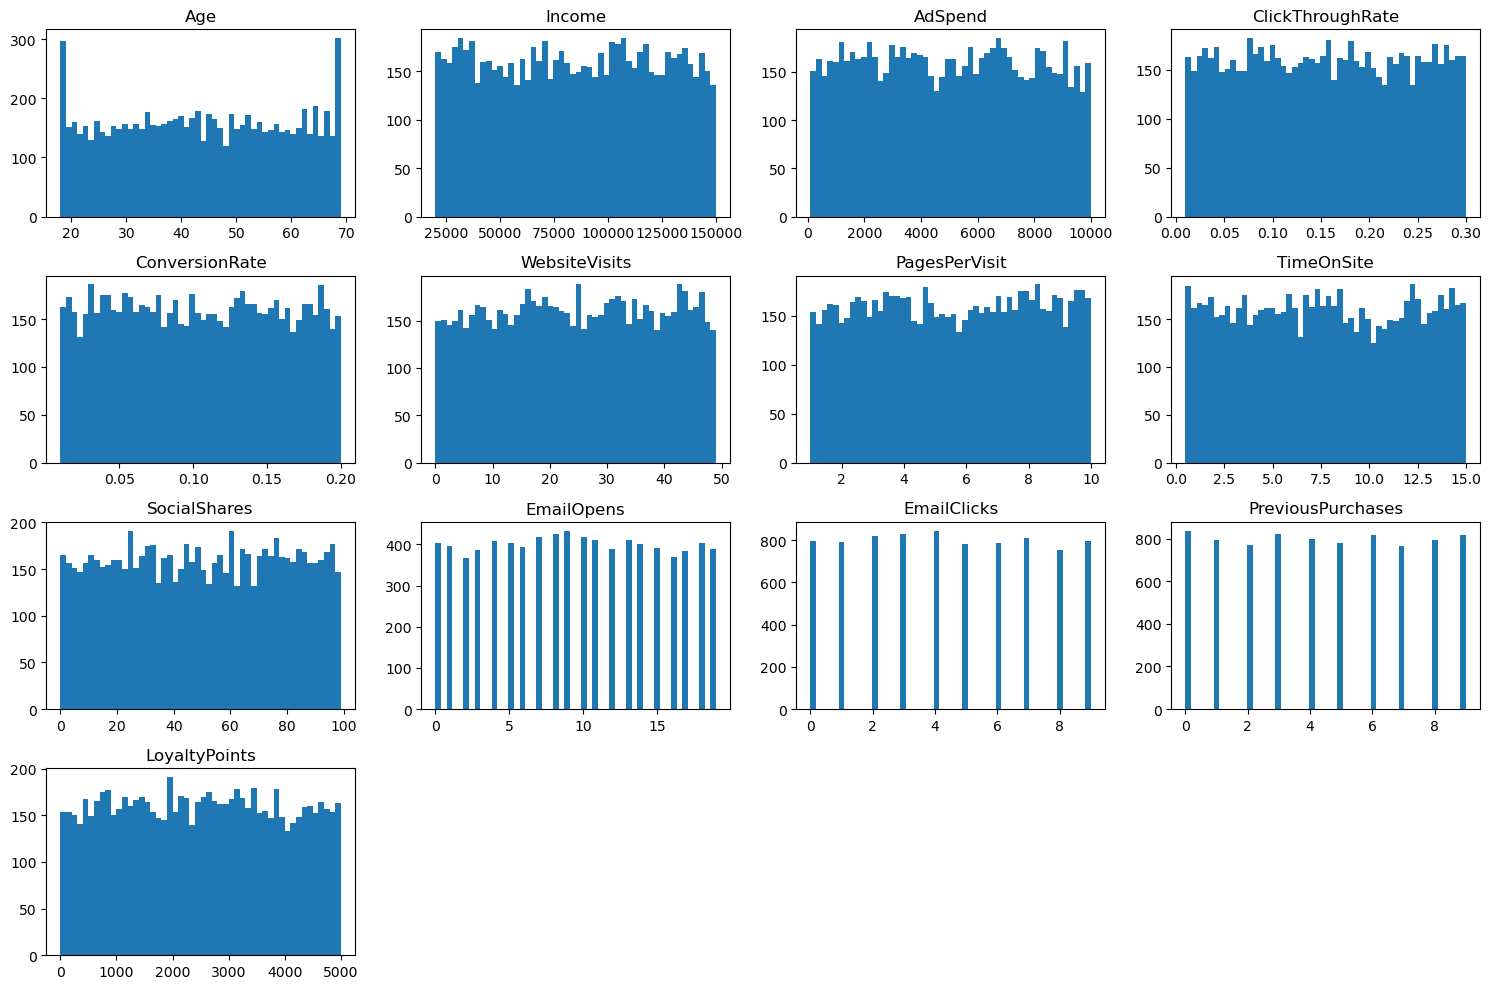

In [18]:
#Studying distributions
columns_to_plot = [col for col in df.columns if col not in ['CustomerID','Gender','CampaignChannel','CampaignType','AdvertisingPlatform','AdvertisingTool','Conversion']]

fig, axes = plt.subplots(4, 4, figsize=(15, 10))  
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    axes[i].hist(df[col], bins=50)
    axes[i].set_title(col) 

for i in range(len(columns_to_plot), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

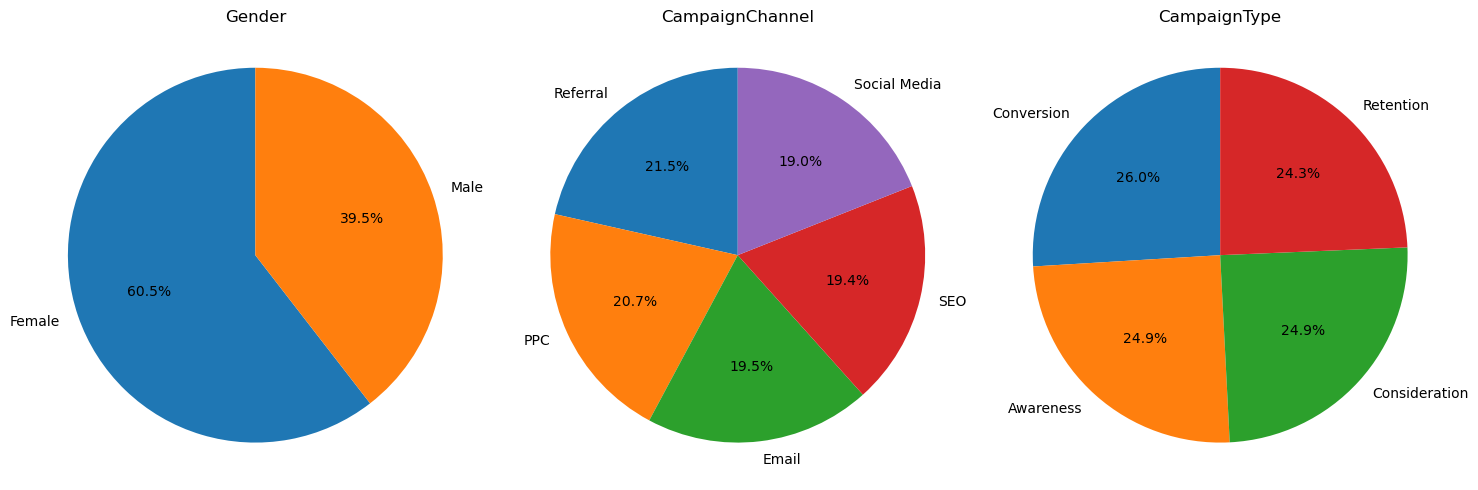

In [19]:
#Proportions in categorical features
categorical_columns = df.select_dtypes(include='object').columns

#Ignoring the last 2 categorical columns as they are confidential
cols_to_plot = categorical_columns[:3]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(cols_to_plot):
    proportions = df[col].value_counts(normalize=True)
    axes[i].pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(col)
    axes[i].axis('equal') 

plt.tight_layout()
plt.show()

In [27]:
import pandas as pd

pd.set_option('display.max_columns', None)

# Load your dataset (replace with correct CSV file)
df = pd.read_csv("digital_marketing_campaign_dataset.csv")

# Show columns so you can verify names
print(df.columns.tolist())

# Drop columns safely
df = df.drop(columns=["CustomerID", "AdvertisingTool", "AdvertisingPlatform"], errors="ignore")

# Show a sample
df.sample(10)


['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel', 'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints', 'AdvertisingPlatform', 'AdvertisingTool', 'Conversion']


,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
2282,59,Female,139586,Social Media,Conversion,9097.259028,0.203119,0.124014,49,6.809551,11.002144,52,6,8,4,1609,1
1059,68,Male,65302,Email,Awareness,2982.662841,0.018629,0.149063,3,8.513503,1.891856,14,4,4,7,1152,0
5574,27,Male,83843,SEO,Consideration,8263.321398,0.157211,0.079019,14,9.749267,1.571893,78,17,0,5,1449,1
1280,48,Female,81915,SEO,Consideration,899.585230,0.237070,0.193792,13,9.254871,7.151530,72,6,7,7,212,1
5236,50,Female,141265,SEO,Retention,8899.968163,0.027497,0.152687,37,9.984040,13.710489,60,9,1,0,1842,1
3527,32,Female,53575,Referral,Awareness,8618.124455,0.299181,0.172119,37,4.131167,9.506867,95,19,5,0,3986,1
7325,48,Female,74334,Social Media,Conversion,7809.749823,0.238961,0.168208,23,6.442659,1.006703,55,3,5,2,1030,0
7216,50,Female,47618,Email,Retention,9347.203894,0.227997,0.029808,38,8.249041,10.160189,85,5,2,4,1186,1
1634,26,Female,116782,PPC,Retention,1303.572900,0.058045,0.034151,11,3.861480,1.357278,0,7,4,6,2629,1
6016,36,Female,123140,Email,Conversion,9681.594271,0.170787,0.194499,41,8.186098,10.383926,29,10,9,7,801,1


In [28]:
#target variable representation and proportions within the dataframe
df["Conversion"].value_counts()

Conversion
1    7012
0     988
Name: count, dtype: int64

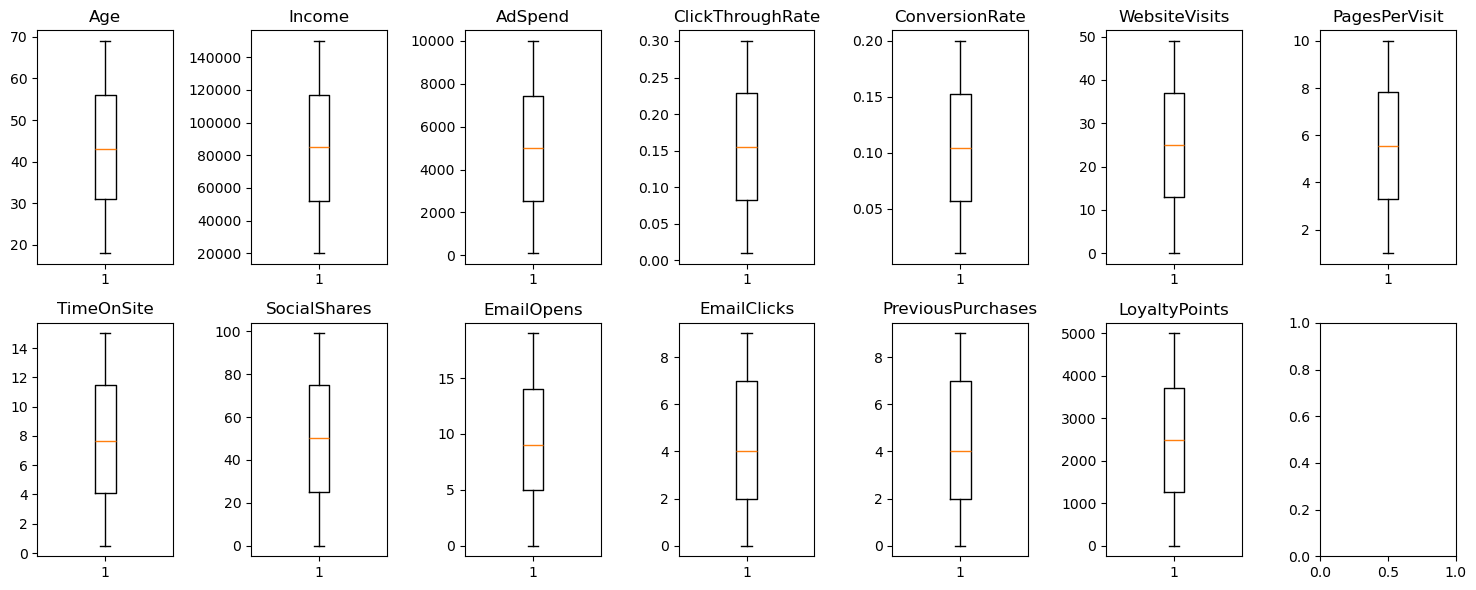

In [29]:
#Outlier detection using boxplots
fig, axes = plt.subplots(2, 7, figsize=(15, 6))  
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
        axes[i].boxplot(df[column])
        axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [30]:
#IQR calculation
#columns_to_plot = [col for col in df.columns if col not in ['CustomerID','Gender','CampaignChannel','CampaignType','AdvertisingPlatform','AdvertisingTool','Conversion']]

for col in columns_to_plot:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    print("Outliers in column ",col)
    outliers=df[(df[col]<lower_bound)|(df[col]>upper_bound)]
    print(outliers)

Outliers in column  Age
Empty DataFrame
Columns: [Age, Gender, Income, CampaignChannel, CampaignType, AdSpend, ClickThroughRate, ConversionRate, WebsiteVisits, PagesPerVisit, TimeOnSite, SocialShares, EmailOpens, EmailClicks, PreviousPurchases, LoyaltyPoints, Conversion]
Index: []
Outliers in column  Income
Empty DataFrame
Columns: [Age, Gender, Income, CampaignChannel, CampaignType, AdSpend, ClickThroughRate, ConversionRate, WebsiteVisits, PagesPerVisit, TimeOnSite, SocialShares, EmailOpens, EmailClicks, PreviousPurchases, LoyaltyPoints, Conversion]
Index: []
Outliers in column  AdSpend
Empty DataFrame
Columns: [Age, Gender, Income, CampaignChannel, CampaignType, AdSpend, ClickThroughRate, ConversionRate, WebsiteVisits, PagesPerVisit, TimeOnSite, SocialShares, EmailOpens, EmailClicks, PreviousPurchases, LoyaltyPoints, Conversion]
Index: []
Outliers in column  ClickThroughRate
Empty DataFrame
Columns: [Age, Gender, Income, CampaignChannel, CampaignType, AdSpend, ClickThroughRate, Conve

In [31]:
#Outlier validation using z-scores
for col in columns_to_plot:
    df['zscore']=np.abs(stats.zscore(df[col]))
    print("Outliers in column ",col)
    outliers=df[df["zscore"]>3]
    print(outliers)

Outliers in column  Age
Empty DataFrame
Columns: [Age, Gender, Income, CampaignChannel, CampaignType, AdSpend, ClickThroughRate, ConversionRate, WebsiteVisits, PagesPerVisit, TimeOnSite, SocialShares, EmailOpens, EmailClicks, PreviousPurchases, LoyaltyPoints, Conversion, zscore]
Index: []
Outliers in column  Income
Empty DataFrame
Columns: [Age, Gender, Income, CampaignChannel, CampaignType, AdSpend, ClickThroughRate, ConversionRate, WebsiteVisits, PagesPerVisit, TimeOnSite, SocialShares, EmailOpens, EmailClicks, PreviousPurchases, LoyaltyPoints, Conversion, zscore]
Index: []
Outliers in column  AdSpend
Empty DataFrame
Columns: [Age, Gender, Income, CampaignChannel, CampaignType, AdSpend, ClickThroughRate, ConversionRate, WebsiteVisits, PagesPerVisit, TimeOnSite, SocialShares, EmailOpens, EmailClicks, PreviousPurchases, LoyaltyPoints, Conversion, zscore]
Index: []
Outliers in column  ClickThroughRate
Empty DataFrame
Columns: [Age, Gender, Income, CampaignChannel, CampaignType, AdSpend,

In [33]:
#Scaling of numerical features
#data has a flat distribution, we will be using minmax scaler
numerical_cols=["Age","Income","AdSpend","ClickThroughRate","ConversionRate","WebsiteVisits","PagesPerVisit","TimeOnSite","SocialShares","EmailOpens","EmailClicks","PreviousPurchases","LoyaltyPoints"]
scaler=MinMaxScaler()
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])

In [34]:
#removing the zscore column as it is not needed
df=df.drop(columns=["zscore"])

In [35]:
#One hot encoding of categorical features
df=pd.get_dummies(df,columns=['Gender','CampaignChannel','CampaignType'], prefix=['Gender','CampaignChannel','CampaignType'], drop_first=True)

In [36]:
#adding conversion target column to the end of the dataframe
moving_conversion=df.pop('Conversion')
df=df.assign(Conversion=moving_conversion)

In [38]:
#reimporting the original unmodified dataframe for specific analysis
original_df=pd.read_csv("digital_marketing_campaign_dataset.csv")
original_df=original_df.drop(columns=["CustomerID","AdvertisingPlatform","AdvertisingTool"])

In [39]:
#conversions per channel
conversion_per_channel = original_df.groupby('CampaignChannel')['Conversion'].value_counts().unstack(fill_value=0)
conversion_per_channel.reset_index()
conversion_per_channel

Conversion,0,1
CampaignChannel,,
Email,202,1355
PPC,194,1461
Referral,201,1518
SEO,191,1359
Social Media,200,1319


In [41]:
#chi-squared test for referral channel
contingency_table=pd.crosstab(original_df['CampaignChannel'], original_df['Conversion'])
chi2, p, dof, expected= stats.chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

alpha = 0.05  # Significance level (common choice)
if p < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Chi-squared statistic: 2.7848540643624053
P-value: 0.5944499903760994
Degrees of freedom: 4
Expected frequencies:
 [[ 192.2895 1364.7105]
 [ 204.3925 1450.6075]
 [ 212.2965 1506.7035]
 [ 191.425  1358.575 ]
 [ 187.5965 1331.4035]]
Fail to reject the null hypothesis.


In [42]:
print(contingency_table)

Conversion         0     1
CampaignChannel           
Email            202  1355
PPC              194  1461
Referral         201  1518
SEO              191  1359
Social Media     200  1319


In [43]:
#segmenting customers based on their age
ages = list(range(18, 70))
original_df['AgeGroup'] = pd.cut(original_df['Age'], bins=4, labels=['18-31', '31-44', '44-57', '57-70'])

#segmenting customers based on their income
income_bins=[20000,50000,100000,150001]
income_labels=['Low','Medium','High']
original_df['IncomeGroup']=pd.cut(original_df['Income'], bins=income_bins, labels=income_labels, right=False)

C:\Users\ABHIJITH\AppData\Local\Temp\ipykernel_15848\93974.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  campaign_type_per_age_group = original_df.groupby('AgeGroup')['CampaignType'].value_counts().unstack()


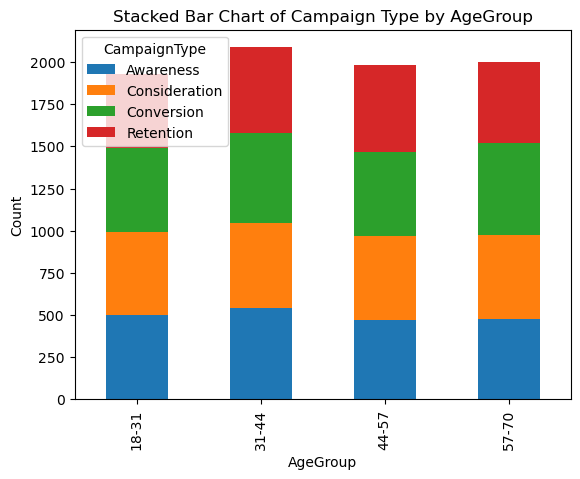

In [44]:
campaign_type_per_age_group = original_df.groupby('AgeGroup')['CampaignType'].value_counts().unstack()
campaign_type_per_age_group.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Campaign Type by AgeGroup')
plt.xlabel('AgeGroup')
plt.ylabel('Count')
plt.show()

C:\Users\ABHIJITH\AppData\Local\Temp\ipykernel_15848\673708084.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  campaign_type_per_income_group = original_df.groupby('IncomeGroup')['CampaignType'].value_counts().unstack()


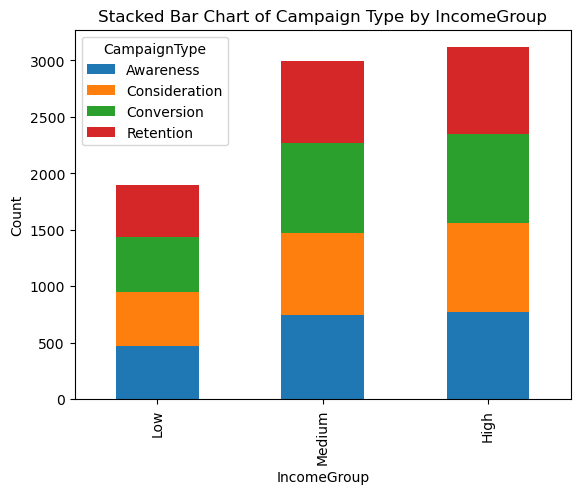

In [45]:
campaign_type_per_income_group = original_df.groupby('IncomeGroup')['CampaignType'].value_counts().unstack()
campaign_type_per_income_group.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Campaign Type by IncomeGroup')
plt.xlabel('IncomeGroup')
plt.ylabel('Count')
plt.show()

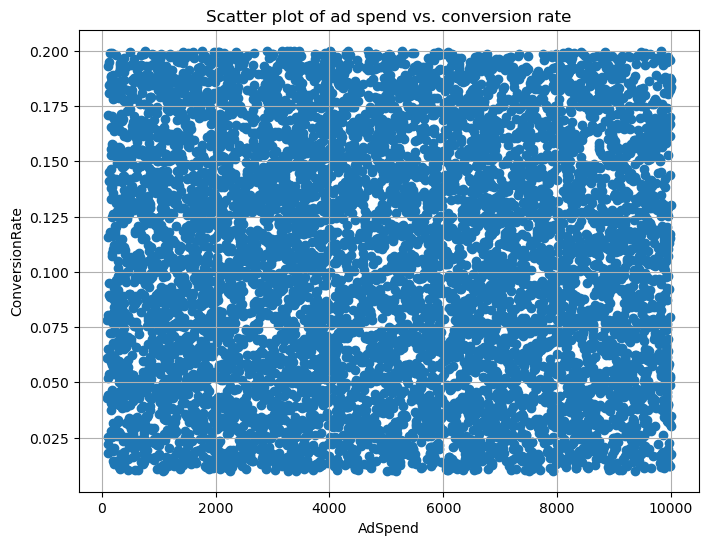

In [46]:
#relationship between ad spend and conversion rates
plt.figure(figsize=(8,6))
plt.scatter(original_df['AdSpend'],original_df['ConversionRate'])
plt.xlabel('AdSpend')
plt.ylabel('ConversionRate')
plt.title('Scatter plot of ad spend vs. conversion rate')
plt.grid(True)
plt.show()

In [47]:
#verifying the existence or absence of relationship between ad spend and conversion rates
correlation, p_value= spearmanr(original_df['AdSpend'], original_df['ConversionRate'])
print(f"Spearman Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

Spearman Correlation Coefficient: -0.020086208751347014
P-value: 0.07242049648810223


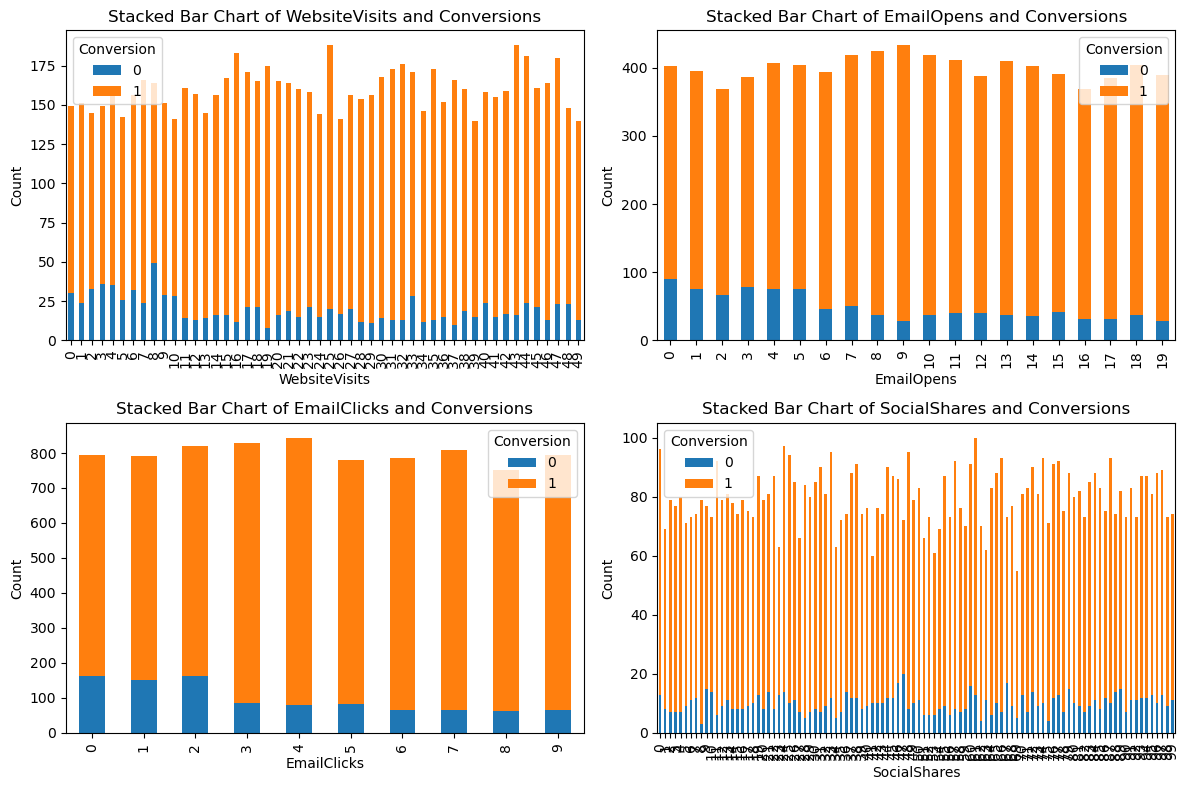

In [48]:
#plotting with respect to conversion
features_to_plot= ['WebsiteVisits', 'EmailOpens', 'EmailClicks', 'SocialShares']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for i, feature in enumerate(features_to_plot):
    grouped = original_df.groupby(feature)['Conversion'].value_counts().unstack()
    grouped.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'Stacked Bar Chart of {feature} and Conversions')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [49]:
#Segmentation
#gender=male
gender_male=original_df[original_df['Gender']=='Male']
#gender=female
gender_female=original_df[original_df['Gender']=='Female']
#income low
income_low=original_df[original_df['IncomeGroup']=='Low']
#income medium
income_medium=original_df[original_df['IncomeGroup']=='Medium']
#income high
income_high=original_df[original_df['IncomeGroup']=='High']
#Young adults
young_adults=original_df[original_df['AgeGroup']=='18-31']
#early middle age
early_middle_age=original_df[original_df['AgeGroup']=='31-44']
#middle age
middle_age=original_df[original_df['AgeGroup']=='44-57']
#senior
senior=original_df[original_df['AgeGroup']=='57-70']

In [50]:
segmented_dfs=[gender_male,gender_female,income_low,income_medium,income_high,young_adults,early_middle_age,middle_age,senior]
segmented_dfs_str=['gender_male','gender_female','income_low','income_medium','income_high','young_adults','early_middle_age','middle_age','senior']

for i,segmented_df in enumerate(segmented_dfs):
    print(f"Number of records matching with {segmented_dfs_str[i]} is ", segmented_df.shape[0])

Number of records matching with gender_male is  3161
Number of records matching with gender_female is  4839
Number of records matching with income_low is  1892
Number of records matching with income_medium is  2992
Number of records matching with income_high is  3116
Number of records matching with young_adults is  1930
Number of records matching with early_middle_age is  2087
Number of records matching with middle_age is  1984
Number of records matching with senior is  1999


(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

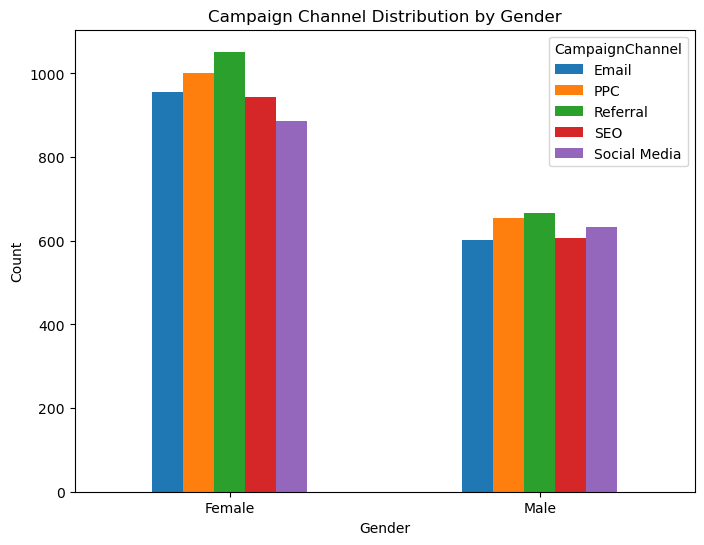

In [51]:
#campaign channel per gender
channel_gender = original_df.groupby(['Gender', 'CampaignChannel']).size().unstack()
ax = channel_gender.plot(kind='bar', figsize=(8, 6))
plt.title('Campaign Channel Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

C:\Users\ABHIJITH\AppData\Local\Temp\ipykernel_15848\959630948.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_age = original_df.groupby(['AgeGroup', 'CampaignChannel']).size().unstack()


(array([0, 1, 2, 3]),
 [Text(0, 0, '18-31'),
  Text(1, 0, '31-44'),
  Text(2, 0, '44-57'),
  Text(3, 0, '57-70')])

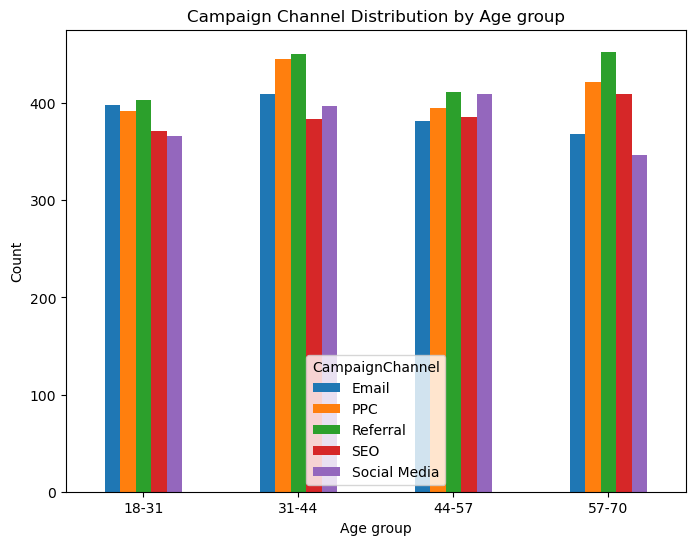

In [52]:
#campaign channel per age group
channel_age = original_df.groupby(['AgeGroup', 'CampaignChannel']).size().unstack()
ax = channel_age.plot(kind='bar', figsize=(8, 6))
plt.title('Campaign Channel Distribution by Age group')
plt.xlabel('Age group')
plt.ylabel('Count')
plt.xticks(rotation=0) 

C:\Users\ABHIJITH\AppData\Local\Temp\ipykernel_15848\1787082195.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_age = original_df.groupby(['AgeGroup', 'Conversion']).size().unstack()


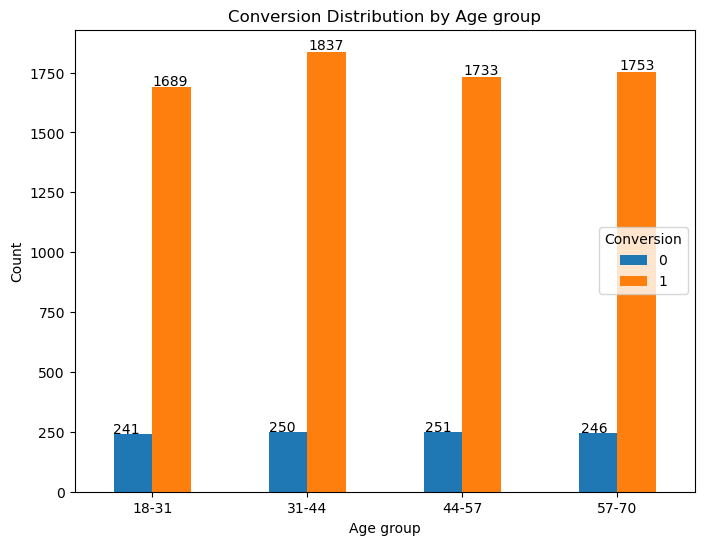

In [53]:
#conversion per age group
conversion_age = original_df.groupby(['AgeGroup', 'Conversion']).size().unstack()
ax = conversion_age.plot(kind='bar', figsize=(8, 6))
plt.title('Conversion Distribution by Age group')
plt.xlabel('Age group')
plt.ylabel('Count')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

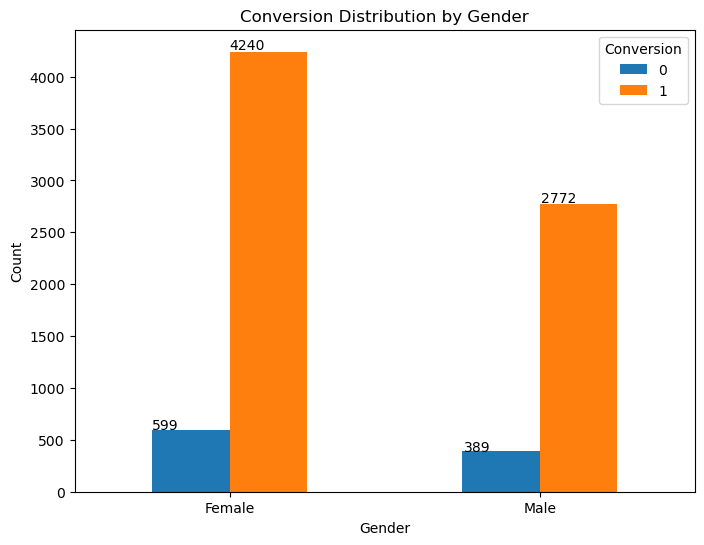

In [54]:
#conversion per gender
conversion_gender = original_df.groupby(['Gender', 'Conversion']).size().unstack()
ax = conversion_gender.plot(kind='bar', figsize=(8, 6))
plt.title('Conversion Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

C:\Users\ABHIJITH\AppData\Local\Temp\ipykernel_15848\2938795585.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_income = original_df.groupby(['IncomeGroup', 'Conversion']).size().unstack()


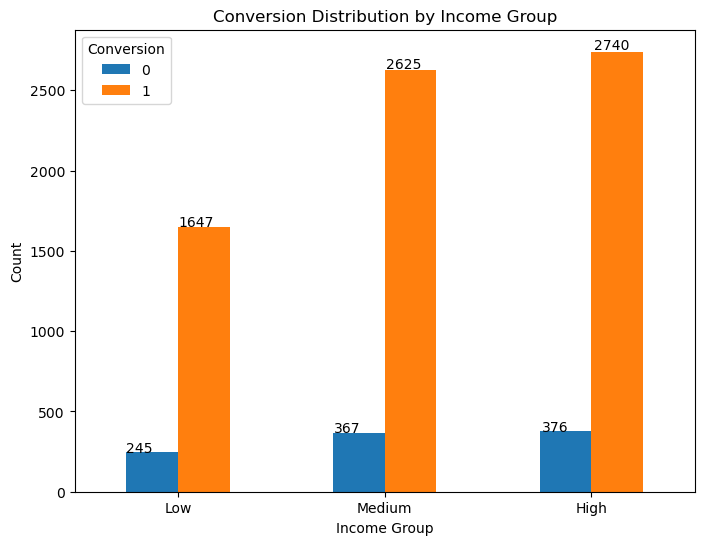

In [55]:
#conversion per income group
conversion_income = original_df.groupby(['IncomeGroup', 'Conversion']).size().unstack()
ax = conversion_income.plot(kind='bar', figsize=(8, 6))
plt.title('Conversion Distribution by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [56]:
#chi square test of independence for gender and conversion
contingency_table = pd.crosstab(original_df['Gender'], original_df['Conversion'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

alpha = 0.05

if p < alpha:
    print("The difference in frequency of conversion between males and females is statistically significant.")
else:
    print("The difference in frequency of conversion between males and females is not statistically significant.")

Chi-square statistic: 0.0037714130430877447
P-value: 0.9510312300044484
Degrees of freedom: 1
Expected frequencies: [[ 597.6165 4241.3835]
 [ 390.3835 2770.6165]]
The difference in frequency of conversion between males and females is not statistically significant.


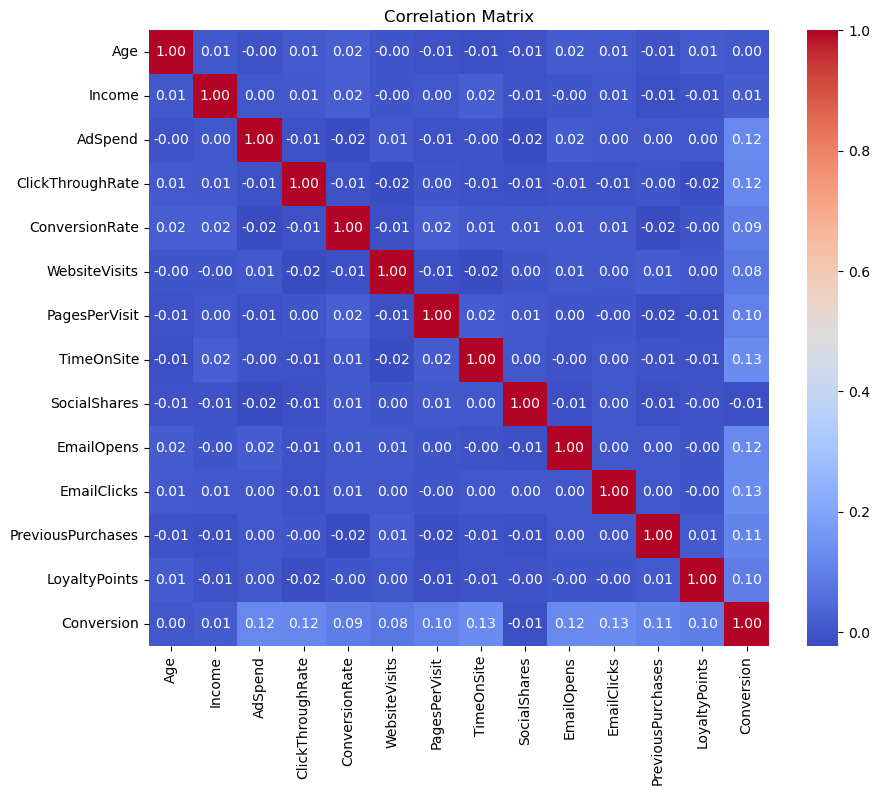

In [57]:
#correlation matrix
numerical_df = original_df.select_dtypes(include=['number']) 

correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [58]:
#finding minimum and maximum values of the correlation matrix
corr_array = correlation_matrix.to_numpy()
mask = np.eye(corr_array.shape[0], dtype=bool)
corr_array_masked = corr_array[~mask] 

min_corr = np.min(corr_array_masked)
max_corr = np.max(corr_array_masked)

print(f"Minimum correlation (excluding diagonal): {min_corr}")
print(f"Maximum correlation (excluding diagonal): {max_corr}")

Minimum correlation (excluding diagonal): -0.023208926149796007
Maximum correlation (excluding diagonal): 0.1296088266250902


In [59]:
#ML Models
df["Conversion"]=df["Conversion"].replace({0:False, 1:True})

C:\Users\ABHIJITH\AppData\Local\Temp\ipykernel_15848\907629087.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Conversion"]=df["Conversion"].replace({0:False, 1:True})


In [60]:
##Keeping 988 random records of class True to balance the dataset
df_True= df[df['Conversion']==True]
df_False=df[df['Conversion']==False]
df_True_sampled=df_True.sample(n=988, random_state=42)
balanced_df= pd.concat([df_True_sampled,df_False], ignore_index=True)
balanced_df=balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [61]:
X=balanced_df.drop(columns=['Conversion'])
y=balanced_df['Conversion']

Accuracy: 0.7045454545454546
Classification Report:
              precision    recall  f1-score   support

       False       0.72      0.69      0.70       200
        True       0.69      0.72      0.71       196

    accuracy                           0.70       396
   macro avg       0.70      0.70      0.70       396
weighted avg       0.71      0.70      0.70       396



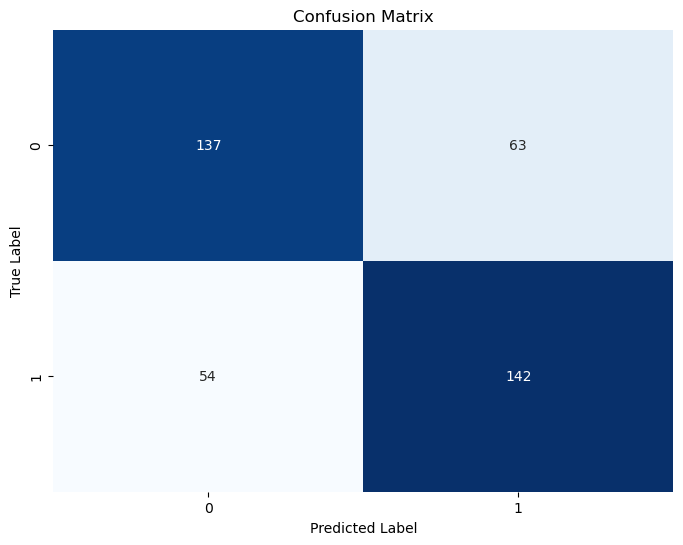

In [62]:
#Logistic regression
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)
y_pred=model_lr.predict(X_test)

#Accuracy
accuracy_lr=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy_lr}")

#Classification report
print('Classification Report:')
print(classification_report(y_test,y_pred))

#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [63]:
#Logistic Regression with cross-validation
k=10
kf=KFold(n_splits=k, shuffle=True, random_state=42)
cv_scores_lr=cross_val_score(model_lr, X,y,cv=kf, scoring='accuracy')
print(f"Cross Validation Scores: {cv_scores_lr}")
print(f"Mean cross validation accuracy: {cv_scores_lr.mean()}")
print(f"Standard deviation of cross-validation accuracy: {cv_scores_lr.std()}")


Cross Validation Scores: [0.68686869 0.72727273 0.64646465 0.72222222 0.74242424 0.67676768
 0.75634518 0.70050761 0.74619289 0.72081218]
Mean cross validation accuracy: 0.7125878070040507
Standard deviation of cross-validation accuracy: 0.03282238516914673


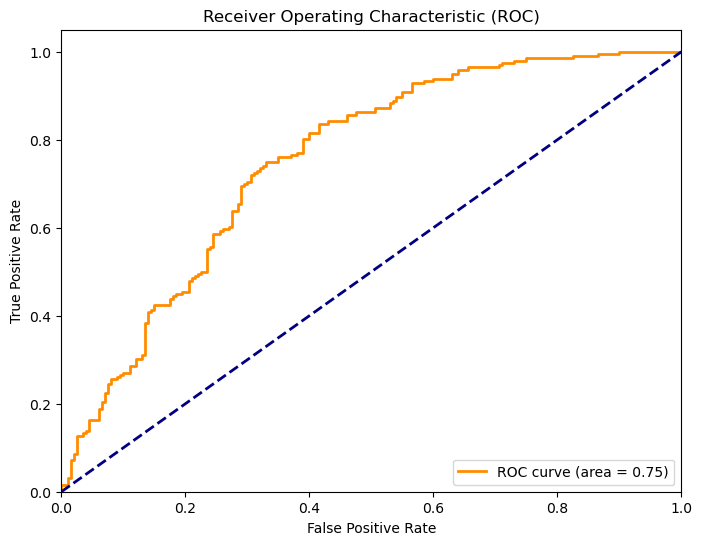

In [64]:
#ROC Curve
y_prob = model_lr.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob) 
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.5580808080808081
Classification Report:
              precision    recall  f1-score   support

       False       0.56      0.56      0.56       200
        True       0.55      0.56      0.55       196

    accuracy                           0.56       396
   macro avg       0.56      0.56      0.56       396
weighted avg       0.56      0.56      0.56       396



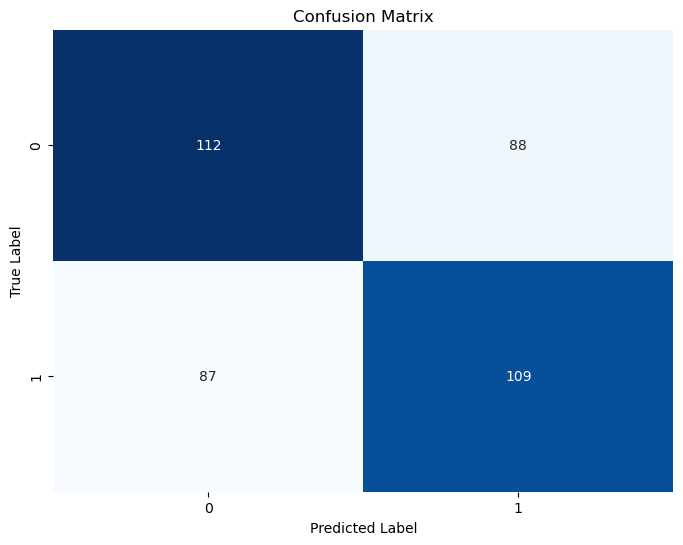

In [65]:
#DECISION TREE
model_dt=DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred=model_dt.predict(X_test)

#Accuracy
accuracy_dt=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy_dt}")

#Classification report
print('Classification Report:')
print(classification_report(y_test,y_pred))

#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [66]:
#DT with cross-validation
k=10
kf=KFold(n_splits=k, shuffle=True, random_state=42)
cv_scores_dt=cross_val_score(model_dt, X,y,cv=kf, scoring='accuracy')
print(f"Cross Validation Scores: {cv_scores_dt}")
print(f"Mean cross validation accuracy: {cv_scores_dt.mean()}")
print(f"Standard deviation of cross-validation accuracy: {cv_scores_dt.std()}")


Cross Validation Scores: [0.64141414 0.57070707 0.5959596  0.65151515 0.56565657 0.69191919
 0.66497462 0.58375635 0.56345178 0.59898477]
Mean cross validation accuracy: 0.6128339229862072
Standard deviation of cross-validation accuracy: 0.04364311726044495


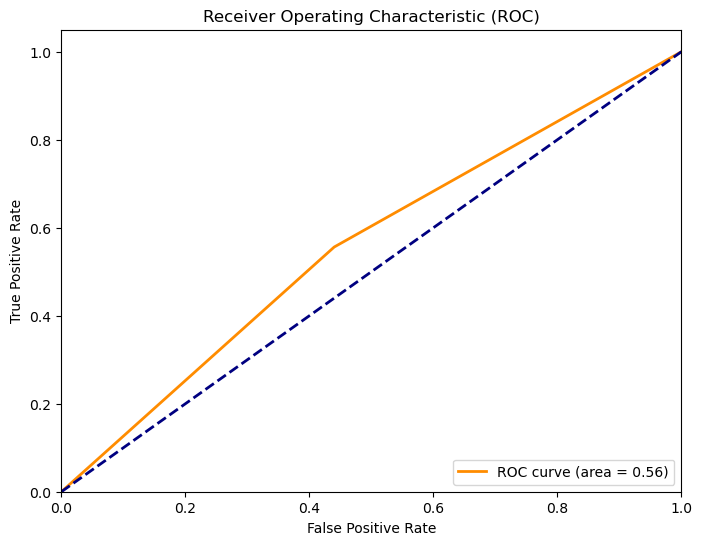

In [67]:
y_prob = model_dt.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob) 
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

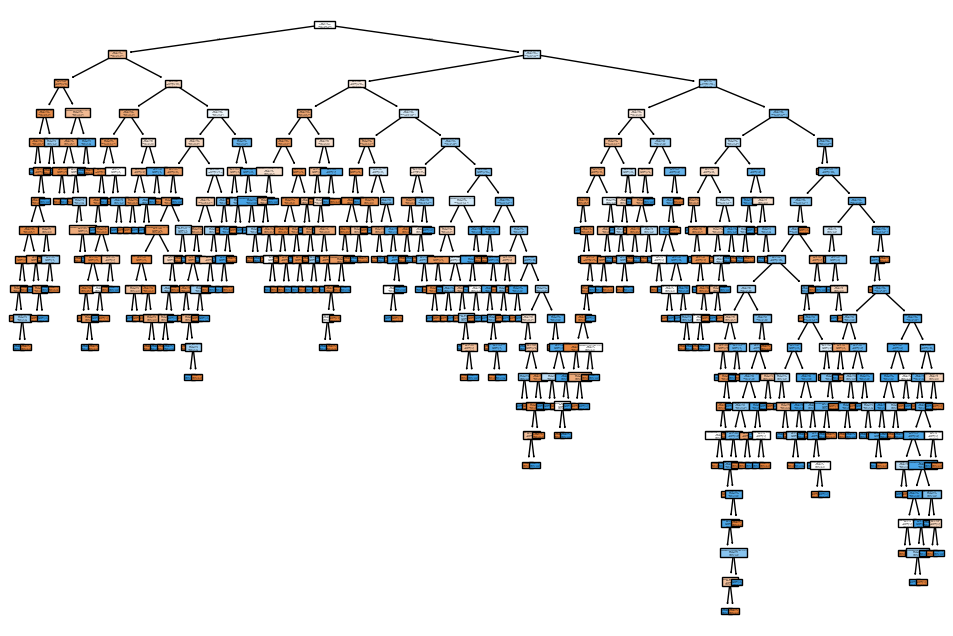

In [69]:
#plotting the decision tree
plt.figure(figsize=(12, 8)) 
plot_tree(model_dt, filled=True, feature_names=X.columns, class_names=['False','True']) 
plt.show()

In [70]:
print(f"Accuracy scores for logistic regression 10-fold CV: {cv_scores_lr}")
print(f"Accuracy scores for decision tree 10-fold CV: {cv_scores_dt} ")

Accuracy scores for logistic regression 10-fold CV: [0.68686869 0.72727273 0.64646465 0.72222222 0.74242424 0.67676768
 0.75634518 0.70050761 0.74619289 0.72081218]
Accuracy scores for decision tree 10-fold CV: [0.64141414 0.57070707 0.5959596  0.65151515 0.56565657 0.69191919
 0.66497462 0.58375635 0.56345178 0.59898477] 


In [71]:
#paired t-test for accuracy scores dt vs. lr
differnces= np.array(cv_scores_lr)-np.array(cv_scores_dt)
t_statistic, p_value= ttest_rel(cv_scores_lr,cv_scores_dt)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha=0.05
if p_value < alpha:
    print("The difference in accuracy is statistically significant.")
else:
    print("The difference in accuracy is not statistically significant.")

T-statistic: 4.966162330418528
P-value: 0.0007739609070440272
The difference in accuracy is statistically significant.
